# Simplest use case

## Running a model from the config file

Setting up the `dolphin` ecosystem:

- Install `dolphin`, `lenstronomy`, and the required dependencies.
- Create an input/output directory for `dolphin`, we are using "../io_directory_example" in this example.
- Set up these directories inside the input/output directory. Look inside "../io_directory_example" for example. 
    - **data**: contains subdirectories for each lens system with a data and PSF files for each band.
    - **settings**: contains the 'config_{lens_name}.yml' files for each lens system,
    - **logs**: to write the log files from model runs,
    - **outputs**: to save the model outputs,
    - **hpc**: *optional*, contains scripts to submit batch jobs in MPI.
 

   
### Data format

The image data file needs to be in the hdf5 formate with the following datasets:

- `image_data`: reduced and background subtracted image cutout centered at the lens system,
- `background_rms`: background level,
- `exposure_time`: the map of exposure times for each pixel, so that `image_data * exposure_time` is Poisson noise distributed,
- `ra_at_xy_0`: RA of the (0, 0) pixel in the `image_data` cutout,
- `dec_at_xy_0`: Dec of the (0, 0) pixel in the `image_data` cutout,
- `transform_pix2angle`: a transform matrix to map the pixel numbers (x, y) to angles (RA, Dec).

The PSF data file needs to be in the hdf5 format with the following datasets:

- `kernel_point_source`: a pixelated PSF (not required to have the same dimension of `image_data`),
- `psf_error_map`: *optional*, uncertainty in the provided PSF, needs to have the same dimension of `kernel_point_source`. 

### Config file format

The 'config_{lens_name}.yml' file provides you options to set up the lens model. Here is the content of the config file that is used in the example model below.

### create a `Processor` instance and point to the IO directory

In [1]:
# from dolphin.processor import Processor

# processor = Processor('../io_directory_example/')

### Run a model by calling the  `swim()` method

In [2]:
# processor.swim(lens_name='DCLS1507+0522', model_id='F200LP_Run01', recipe_name='galaxy-galaxy')

## Let's check the output

In [3]:
from dolphin.analysis.output import Output

output = Output('../io_directory_example/')

### DCLS1507+0522, Filter F200LP

-7.434111871431755 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  7.434111871431755


/Users/hskobe/packages/lenstronomy/lenstronomy/Plots/model_band_plot.py:43: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/Users/hskobe/packages/lenstronomy/lenstronomy/Plots/model_band_plot.py:43: RuntimeWarning: invalid value encountered in log10
  log_model = np.log10(model)
/Users/hskobe/packages/lenstronomy/lenstronomy/Plots/model_band_plot.py:101: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data), origin='lower',
/Users/hskobe/packages/lenstronomy/lenstronomy/Plots/model_band_plot.py:136: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(self._model), origin='lower', vmin=v_min, vmax=v_max,
/Users/hskobe/packages/lenstronomy/lenstronomy/Plots/model_band_plot.py:136: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._model), origin='lower', vmin=v_min, vmax=v_max,
/Users/hskobe/packages/dolphin/dolphin/analysis/output.py:278: UserWarning: Tight 

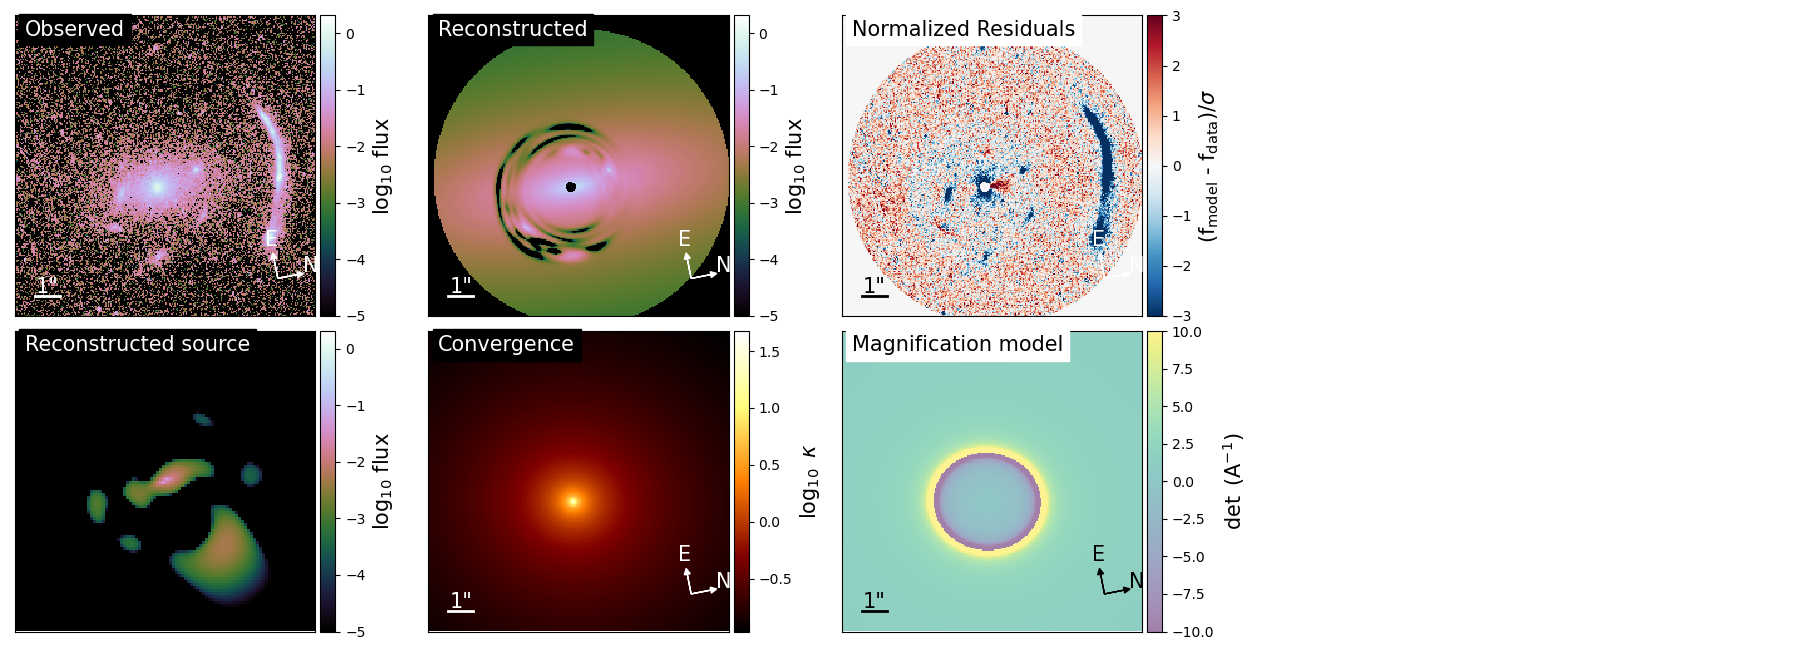

In [4]:
fig = output.plot_model_overview(lens_name='DCLS1507+0522', model_id='F200LP_Run01', band_index=0)

In [5]:
output.load_output(lens_name='DCLS1507+0522', model_id='F200LP_Run01')
output.kwargs_result

{'kwargs_lens': [{'theta_E': 2.041591201566631,
   'gamma': 2.0,
   'e1': -0.04042282239564463,
   'e2': -0.026879401057752494,
   'center_x': 0.0009900419606265678,
   'center_y': 0.09614436088801345},
  {'gamma_ext': 0.001, 'psi_ext': 0.0, 'ra_0': 0, 'dec_0': 0}],
 'kwargs_source': [{'amp': 1,
   'n_max': 10,
   'beta': 0.16981244898096812,
   'center_x': -0.16898231418541867,
   'center_y': -0.33350240536451076},
  {'amp': 1,
   'R_sersic': 0.042513306660087055,
   'n_sersic': 4.0,
   'e1': -0.47077416659919286,
   'e2': 0.17106622150541886,
   'center_x': -0.16898231418541867,
   'center_y': -0.33350240536451076}],
 'kwargs_lens_light': [{'amp': 1,
   'R_sersic': 4.998208666368458,
   'n_sersic': 4.0,
   'e1': -0.4830043805168633,
   'e2': -0.03502346816842292,
   'center_x': 0.0009900419606265678,
   'center_y': 0.09614436088801345},
  {'amp': 1,
   'R_sersic': 0.18976873297938984,
   'n_sersic': 1.0,
   'e1': -0.4830043805168633,
   'e2': -0.03502346816842292,
   'center_x': 0.00

### DESJ0537-4647, All Filters, F140W 0.08" & F200LP 0.05"

In [6]:
# fig = output.plot_model_overview(lens_name='DESJ0537-4647', model_id='AllFilters_Run01', band_index=0)

In [7]:
# fig = output.plot_model_overview(lens_name='DESJ0537-4647-0008-IR', model_id='F140W_Run01')

In [8]:
# output.load_output(lens_name='DESJ0537-4647-0008-IR', model_id='F140W_Run01')
# output.kwargs_result

In [9]:
# fig = output.plot_model_overview(lens_name='DESJ0537-4647-0008', model_id='AllFilters_Run01', band_index=0)

In [10]:
# fig = output.plot_model_overview(lens_name='DESJ0537-4647-0008', model_id='AllFilters_Run01', band_index=1)

In [11]:
# output.load_output(lens_name='DESJ0537-4647', model_id='AllFilters_Run01')

In [12]:
# output.plot_mcmc_trace(lens_name='DESJ0537-4647-0008', model_id='AllFilters_Run01', walker_ratio=8)

### DESJ0537-4647, All Filters, F140W 0.13" & F200LP 0.05"

In [13]:
# fig = output.plot_model_overview(lens_name='DESJ0537-4647-0013', model_id='AllFilters_Run01', band_index=0)

In [14]:
# fig = output.plot_model_overview(lens_name='DESJ0537-4647-0013', model_id='AllFilters_Run01', band_index=1)

In [15]:
# output.load_output(lens_name='DESJ0537-4647-0013', model_id='AllFilters_Run01')

In [16]:
# output.plot_mcmc_trace(lens_name='DESJ0537-4647', model_id='AllFilters_0.13_Run01', walker_ratio=8)

### DESJ0537-4647, All Filters, F140W 0.10" & F200LP 0.05"

In [17]:
# fig = output.plot_model_overview(lens_name='DESJ0537-4647-0010', model_id='AllFilters_Run01', band_index=0)

In [18]:
# fig = output.plot_model_overview(lens_name='DESJ0537-4647-0010', model_id='AllFilters_Run01', band_index=1)

In [19]:
# output.load_output(lens_name='DESJ0537-4647-0010', model_id='AllFilters_Run01')

### DESJ0006-4429

##### All Filters

In [20]:
# fig = output.plot_model_overview(lens_name='DESJ0006-4429', model_id='AllFilters_Run01', band_index=0)

In [21]:
# fig = output.plot_model_overview(lens_name='DESJ0006-4429', model_id='AllFilters_Run01', band_index=1)

In [22]:
# output.load_output(lens_name='DESJ0006-4429', model_id='AllFilters_Run01')

##### F200LP, 0.05"

In [23]:
# fig = output.plot_model_overview(lens_name='DESJ0006-4429', model_id='F200LP_Run01', band_index=0)

In [24]:
# output.load_output(lens_name='DESJ0006-4429', model_id='F200LP_Run01')

##### F140W, 0.08"

In [25]:
# fig = output.plot_model_overview(lens_name='DESJ0006-4429', model_id='F140W_Run01', band_index=0)

In [26]:
# output.load_output(lens_name='DESJ0006-4429', model_id='F140W_Run01')

## Notebook notes

We only ran a pre-sampling optimization here and did not perform a MCMC sampling. So, the above model is the optimized model that the MCMC sample can initiate from. The `kwargs_result` dictionary of the pre-sampling optimization step can be accessed through `Output.kwargs_result` after loading an output using the `Output.load_output()` method.

In [27]:
# output.load_output(lens_name='DESJ0537-4647', model_id='AllFilters_0.13_Run01')

# output.kwargs_result

When necessary, the settings of the model run---that was read out of the 'config_{lens_name}.yml' file---can be accessed through the `output.model_settings` variable.

In [28]:
# output.model_settings